We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [1]:
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv(r'C:\Users\matui\IronLab\DAFT_905\module_2\Lab_21_Time-Series-Models\airlines_passengers.csv')

Let’s display the first five rows of data

In [3]:
data.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [4]:
data.tail(5)

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [7]:
data['Month'] = pd.to_datetime(data['Month'])
data.head(5)

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


The next thing we can do is convert the month column to an index. 


In [8]:
data.set_index('Month', inplace=True)

Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

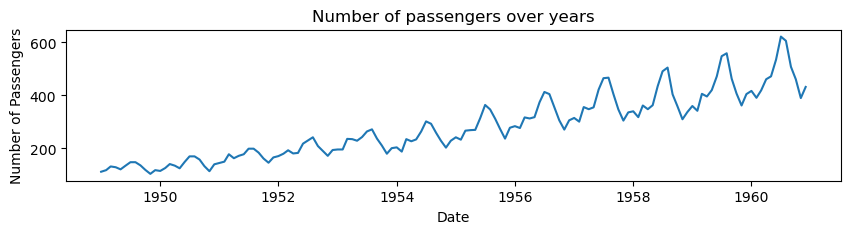

In [11]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    
    plt.figure(figsize=(10,2), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data, x=data.index, y=data.Passengers, title='Number of passengers over years')    

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [12]:
from statsmodels.tsa.stattools import adfuller

Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [13]:
result = adfuller(data['Passengers'], autolag='AIC')

Store our results in a dataframe display it

In [15]:
result
#ADF
#pvalue

(0.8153688792060512,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

Explain the results

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

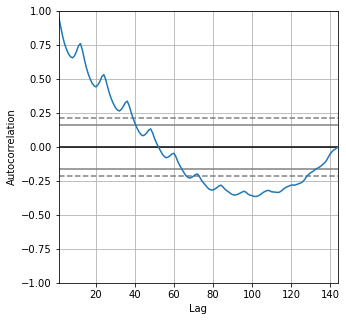

In [16]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(5,5))
autocorrelation_plot(data['Passengers'].tolist())

Calculate partial autocorrelation

Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


In [20]:
dec = seasonal_decompose(data['Passengers'], model='Multiplicative', extrapolate_trend='freq')

C:\Users\matui\AppData\Local\Temp/ipykernel_30576/19388336.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  dec.plot().show()


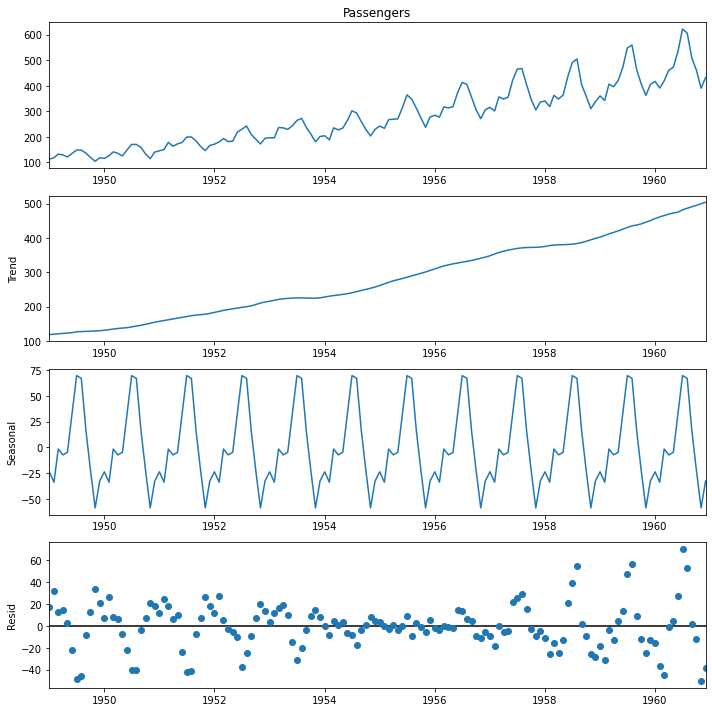

In [21]:
plt.rcParams.update({'figure.figsize': (10,10)})
dec.plot().show()


Can you describe the charts?


In [22]:
#We can see the constant increase of number of passengers over years

Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

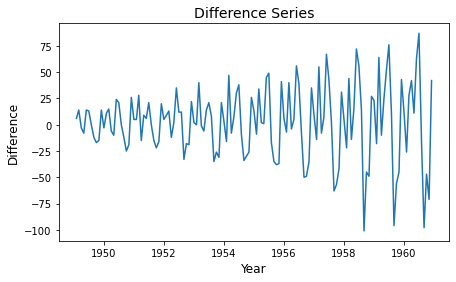

In [24]:
data1=data.copy()
data1["Passengers"] = data1['Passengers'].diff()
data1.dropna(inplace = True)

plt.figure(figsize=(7,4))
plt.plot(data1)
plt.title('Difference Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

In [25]:
result = adfuller(data1.dropna())
print(result)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

(-2.829266824169998, 0.054213290283825676, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.5069317854084)
ADF Test Statistic: -2.83
5% Critical Value: -2.88
p-value: 0.05


MA(1)

In [26]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [27]:
ma1 = ARIMA(data1, order = (0,0,1))
results_ma1 = ma1.fit()

C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Display the output

In [28]:
print(results_ma1.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  143
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -696.414
Date:                Sun, 19 Jun 2022   AIC                           1398.827
Time:                        18:36:36   BIC                           1407.716
Sample:                    02-01-1949   HQIC                          1402.439
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4220      3.735      0.648      0.517      -4.898       9.742
ma.L1          0.4012      0.077      5.202      0.000       0.250       0.552
sigma2       993.2318    107.912      9.204      0.0

MA(2)

In [29]:
ma2 = ARIMA(data1, order = (0,0,2))
results_ma2 = ma2.fit()

C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Display the output

In [30]:
print(results_ma2.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  143
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -695.193
Date:                Sun, 19 Jun 2022   AIC                           1398.386
Time:                        18:36:58   BIC                           1410.237
Sample:                    02-01-1949   HQIC                          1403.201
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4331      2.890      0.842      0.400      -3.230       8.097
ma.L1          0.3735      0.072      5.161      0.000       0.232       0.515
ma.L2         -0.2830      0.061     -4.670      0.0

AR(2)

In [38]:
model_ar2 = ARIMA(data1, order = (2,0,0))
results_ar2 = model_ar2.fit()
print(results_ar2.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  143
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -694.988
Date:                Sun, 19 Jun 2022   AIC                           1397.975
Time:                        18:38:43   BIC                           1409.827
Sample:                    02-01-1949   HQIC                          1402.791
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4075      3.125      0.770      0.441      -3.717       8.532
ar.L1          0.3792      0.088      4.331      0.000       0.208       0.551
ar.L2         -0.2314      0.064     -3.627      0.0

C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARMA (?,?)

In [32]:
model_arma22 = ARIMA(data1, order = (2,0,2))
results_arma22 = model_arma22.fit()

C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\matui\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Display the output

In [33]:
print(results_arma22.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  143
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -666.022
Date:                Sun, 19 Jun 2022   AIC                           1344.044
Time:                        18:37:47   BIC                           1361.821
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5314      0.735      3.444      0.001       1.091       3.972
ar.L1          1.6478      0.028     58.897      0.000       1.593       1.703
ar.L2         -0.9095      0.025    -36.756      0.0

ARIMA(?,?)

In [36]:
model_arima212 = ARIMA(data, order = (2,1,2))
results_arima212 = model_arima212.fit()

C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\matui\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Display the output

In [35]:
print(results_arima212.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Sun, 19 Jun 2022   AIC                           1353.347
Time:                        18:38:14   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.421      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.863      0.0

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [39]:
models_name = ['MA1', 'MA2', 'AR2', 'ARMA','ARIMA']
results = [results_ma1,results_ma2,results_ar2,results_arma22,results_arima212]
from sklearn.metrics import mean_squared_error
rmse = []
for i in range(0, len(models_name)):
    if i != 4:
        r = mean_squared_error(y_true = data1, y_pred = results[i].predict(), squared=False)
        rmse.append(r)
    else:
        r = mean_squared_error(y_true = data, y_pred = results[i].predict(), squared=False)
        rmse.append(r)
rmse

[31.515783318392,
 31.216723895379147,
 31.199716261028676,
 25.05761011031715,
 27.643055812434707]

In [40]:
results_rmse = list(zip(models_name,rmse))
summary = pd.DataFrame(results_rmse, columns=['models_name','rmse'])
summary

,models_name,rmse
0,MA1,31.515783
1,MA2,31.216724
2,AR2,31.199716
3,ARMA,25.057610
4,ARIMA,27.643056


In [41]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error

models = {
    'MA(1)': results_ma1,
    'MA(2)': results_ma2,
    'AR(2)': results_ar2,
    'ARMA(2,2)': results_arma22,
    'ARIMA(2,1,2)': results_arima212
}

for model_name, results in models.items():
    if not ('ARIMA' in model_name):
        print(f'{model_name}: {mean_squared_error(y_true = data1, y_pred = results.predict(), squared=False)}')
    else:
        print(f'{model_name}: {mean_squared_error(y_true = data, y_pred = results.predict(), squared=False)}')

MA(1): 31.515783318392
MA(2): 31.216723895379147
AR(2): 31.199716261028676
ARMA(2,2): 25.05761011031715
ARIMA(2,1,2): 27.643055812434707


Calculate AIC

In [42]:
for model_name, results in models.items():
    print(f'{model_name}: {results.aic}')

MA(1): 1398.827109868048
MA(2): 1398.38553179146
AR(2): 1397.9751521920011
ARMA(2,2): 1344.0436357649194
ARIMA(2,1,2): 1353.3466405317645
